# **Build Linear Regression Model in Python**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, I will be showing you how to build a linear regression model in Python using the scikit-learn package.

Inspired by [scikit-learn's Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)

---

## **Load the Diabetes dataset** (via scikit-learn)

### **Import library**

In [1]:
from sklearn import datasets

### **Load dataset**

In [2]:
diabetes = datasets.load_diabetes()

In [ ]:
diabetes

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/

### **Description of the Diabetes dataset**

In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

### **Feature names**

In [ ]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### **Create X and Y data matrices**

In [ ]:
X = diabetes.data
Y = diabetes.target

In [ ]:
X.shape, Y.shape

((442, 10), (442,))

### **Load dataset + Create X and Y data matrices (in 1 step)**

In [ ]:
X, Y = datasets.load_diabetes(return_X_y=True)

In [ ]:
X.shape, Y.shape

((442, 10), (442,))

## **Load the Boston Housing dataset (via GitHub)**

The Boston Housing dataset was obtained from the mlbench R package, which was loaded using the following commands:

```
library(mlbench)
data(BostonHousing)
```

For your convenience, I have also shared the [Boston Housing dataset](https://github.com/dataprofessor/data/blob/master/BostonHousing.csv) on the Data Professor GitHub package.

### **Import library**

In [1]:
import pandas as pd

### **Download CSV from GitHub**

In [2]:
! wget https://github.com/dataprofessor/data/raw/master/BostonHousing.csv

--2021-07-14 17:18:25--  https://github.com/dataprofessor/data/raw/master/BostonHousing.csv
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv [following]
--2021-07-14 17:18:26--  https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36242 (35K) [text/plain]
Saving to: ‘BostonHousing.csv.1’

BostonHousing.csv.1 100%[===================>]  35.39K  --.-KB/s    in 0.002s  

2021-07-14 17:18:26 (13.9 MB/s) - ‘BostonHousing.csv.1’ saved [36242/36242]



### **Read in CSV file**

In [3]:
BostonHousing = pd.read_csv("BostonHousing.csv")
BostonHousing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### **Split dataset to X and Y variables**

In [4]:
Y = BostonHousing.medv
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [5]:
X = BostonHousing.drop(['medv'], axis=1)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


## **Data split**

### **Import library**

In [6]:
from sklearn.model_selection import train_test_split

### **Perform 80/20 Data split**

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### **Data dimension**

In [8]:
X_train.shape, Y_train.shape

((404, 13), (404,))

In [9]:
X_test.shape, Y_test.shape

((102, 13), (102,))

## **Linear Regression Model**

### **Import library**

In [11]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### **Build linear regression**

#### Defines the regression model

In [12]:
model = linear_model.Lasso()

#### Build training model

In [13]:
model.fit(X_train, Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

#### Apply trained model to make prediction (on test set)

In [14]:
Y_pred = model.predict(X_test)

## **Prediction results**

### **Print model performance**

In [15]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [-0.09695165  0.04290544 -0.          0.         -0.          1.05263989
  0.01403459 -0.60167195  0.26625746 -0.01449523 -0.71750701  0.0084702
 -0.73605393]
Intercept: 39.79418848780163
Mean squared error (MSE): 28.95
Coefficient of determination (R^2): 0.68


### **String formatting**

By default r2_score returns a floating number ([more details](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html))

In [16]:
r2_score(Y_test, Y_pred)

0.6784218290892887

In [17]:
r2_score(Y_test, Y_pred).dtype

dtype('float64')

We will be using the modulo operator to format the numbers by rounding it off.

In [18]:
'%f' % 0.523810833536016

'0.523811'

We will now round it off to 3 digits

In [19]:
'%.3f' % 0.523810833536016

'0.524'

We will now round it off to 2 digits

In [20]:
'%.2f' % 0.523810833536016

'0.52'

## **Scatter plots**

### **Import library**

In [21]:
import seaborn as sns

### **Make scatter plot**

#### The Data

In [22]:
Y_test

398     5.0
67     22.0
106    19.5
189    34.9
54     18.9
       ... 
460    16.4
24     15.6
140    14.0
347    23.1
143    15.6
Name: medv, Length: 102, dtype: float64

In [23]:
import numpy as np
np.array(Y_test)

array([ 5. , 22. , 19.5, 34.9, 18.9, 23.9, 19.8, 21.2, 21.7, 19.4, 23.8,
       15.6,  8.7, 26.7, 28.1, 22.9, 21.7, 20. , 50. , 31.5, 19. , 22.2,
       37.9, 15. , 18.1, 20. , 23.2, 23. , 23.3, 21.7, 25. , 29. , 10.5,
       25. , 21.2, 13.9, 18.7, 20.2, 19.3, 23.2, 23.1, 23.4, 19.9,  8.5,
       50. , 20.3, 12.7, 27.5, 19.9, 36.2, 44. , 24.7, 28.7, 21.8, 24.5,
       17.1,  7. , 12.5, 22.4, 16.1, 13.4, 20.6, 13.8, 23.9, 14.8, 15.6,
       19.6, 13.6, 23.7, 28.5, 11.8, 32. , 20.4, 48.5, 24.8, 45.4, 15.1,
       15.6, 38.7, 26.4, 25. , 33.4, 13.5,  8.8, 22. , 14.9, 36.2, 19.4,
       19.9, 22.6, 50. , 42.3, 44.8, 23.3, 19.7, 21.8, 18.7, 16.4, 15.6,
       14. , 23.1, 15.6])

In [24]:
Y_pred

array([ 5.41182025, 22.80022093, 16.26613919, 31.12889715, 16.80204601,
       24.5381832 , 19.52277053, 24.13694731, 19.93044634, 18.89287275,
       23.39252155, 20.12128412,  7.90334631, 27.96272309, 24.63854714,
       25.90124804, 19.33432667, 14.51979103, 34.77113264, 31.01686907,
       14.96036084, 26.54284654, 32.00617809, 18.71580218, 16.89575751,
       19.86992802, 20.53879715, 22.34723081, 29.43837955, 21.71243293,
       28.70368852, 27.88800707,  7.63566886, 28.60941925, 22.15593841,
       16.0941089 , 21.02340002, 23.66618227, 20.93012518, 28.16176364,
       16.58838173, 23.76748396, 22.62468642,  6.70159311, 24.47184112,
       22.57526304, 12.43530396, 15.33155371, 18.83220959, 27.20047802,
       35.00511747, 23.5534863 , 27.40302749, 21.78525735, 29.31703331,
       18.94017389, -3.70721786, 17.6526525 , 23.65066149, 19.87615108,
       11.7846124 , 21.49438957,  4.59040984, 27.95958985, 16.05705934,
       20.66863322, 19.52090437, 13.89284948, 28.30160338, 32.40

#### Making the scatter plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


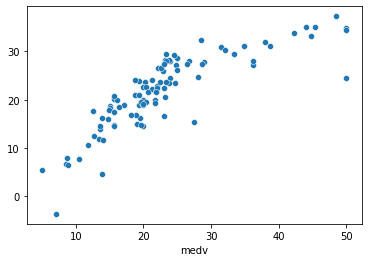

In [25]:
sns.scatterplot(Y_test, Y_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


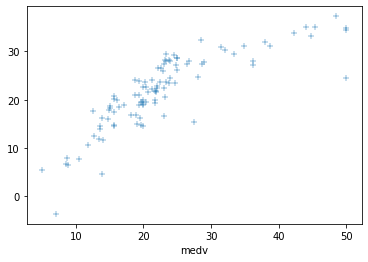

In [26]:
sns.scatterplot(Y_test, Y_pred, marker="+")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


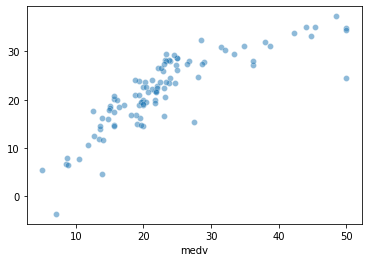

In [27]:
sns.scatterplot(Y_test, Y_pred, alpha=0.5)